# Setup
## Imports

In [1]:
# If colab then setup else pass to rest of the code
try:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=False)
    %cd /content/drive/MyDrive/Coding/spread-res/runscr/
except ImportError: pass

# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import os
import sys
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertGrid

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertGrid)

# Import the model and funcs required from utils
from classes.models.BertGrid import BertGrid
from utils.inferutil import infer_full, infer_one
from utils.setuputil import setup_config
from utils.trainutil import train_model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coding/spread-res/runscr


## Configuration

device = cuda/mps:0 (env-specific), threads = 1 to inf (env-specific), seed = 0 to inf, data_dir = ../data, rows = 100, cols = 100, tokens = 32, save_dir = ../models/

In [2]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertGrid",
    "model_base": "bert-base-cased",
    "data_ds": "manual",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 128,
    "num_hidden_layers": 2,
    "num_attention_heads": 1,
    "intermediate_size": 512,
    # Training Parameters
    "batch_size": 4,
    "lr": 5e-6,
    "mu": 0.25,
    "epochs": 3,
    "patience": 2,
    "save_int": 1,
}

# input_config = {
#     # Environment and Model Info
#     "env": "local",
#     "approach": "bert",
#     "model_name": "BertGrid",
#     "model_base": "bert-base-cased",
#     "data_ds": "manual",
#     # BERT Architecture Parameters
#     "vocab_size": 30522,
#     "hidden_size": 128,
#     "num_hidden_layers": 1,
#     "num_attention_heads": 1,
#     "intermediate_size": 512,
#     "gradient_checkpointing": False,
#     # Training Parameters
#     "batch_size": 5,
#     "lr": 1e-3,
#     "mu": 0.25,
#     "epochs": 3,
#     "patience": 2,
#     "save_int": 2,
# }
config = setup_config(input_config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

# Define the model
untrained_model = BertGrid(config).to(DEVICE)

Processing files: 100%|██████████| 40/40 [00:08<00:00,  4.48it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 5677.18it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 5364.93it/s]



5(P) = 5(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertGrid",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "manual",
  "data_dir": "../data",
  "train_dir": "../data/manual_train",
  "val_dir": "../data/manual_val",
  "test_dir": "../data/manual_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 128,
  "num_hidden_layers": 2,
  "num_attention_heads": 1,
  "intermediate_size": 512,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 4,
  "lr": 5e-06,
  "mu": 0.25,
  "epochs": 3,
  "patience"

# Model Training

1. GPU Model: 541 mb
2. GPU Training: 33.9 gb

3. Per Epoch Train Time: 7s
4. Per Epoch Val Time: \<1s


In [3]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]


Train Loss: 1.3524e+00, Val Loss: 1.2786e+00

Model Saved

Epoch 1


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]


Train Loss: 1.3261e+00, Val Loss: 1.2505e+00

Model Saved

Epoch 2


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]


Train Loss: 1.2983e+00, Val Loss: 1.2231e+00

Model Saved


TRAINING DONE at epoch 2, best epoch 2
Train Loss = 1.2983089685440063, Perplexity = 1.0000324582509712
Val Loss = 1.223067581653595, Perplexity = 1.000030577157013
Total Training Time = 00:17


# Evaluation


Filename: ../data/manual_train/dlportfoliobydelinquencystatus.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(39,2): 0.440896 | (39,10): 0.454841 | (37,0): 0.456229 | (37,1): 0.465898 | (15,0): 0.468471 | (39,8): 0.473895 | (17,0): 0.476635 | (39,9): 0.486947 | (0,2): 0.487774 | (39,7): 0.488186 | (39,0): 0.488462 | (35,0): 0.488924 | (39,12): 0.488996 | (39,11): 0.489668 | (29,0): 0.491178 | (17,1): 0.491258 | (15,1): 0.491505 | (39,13): 0.492984 | (31,0): 0.493397 | (35,1): 0.497413 | (39,1): 0.497873 | (18,0): 0.501343 | (39,4): 0.503720 | (29,1): 0.506076 | (39,6): 0.506480 | (31,1): 0.507208 | (10,0): 0.507658 | (21,0): 0.508106 | (39,3): 0.509312 | (0,10): 0.510670 | (19,0): 0.510718 | (7,0): 0.511205 | (39,5): 0.511807 | (33,0): 0.512016 | (23,0): 0.513923 | (0,7): 0.513981 | (25,0): 0.514610 | (19,1): 0.517912 | (5,11): 0.518827 | (5,13): 0.519319 | (33,1): 0.521822 | (21,1): 0.522131 | (13,0): 0.523403 | (9,0): 0.523777 | (0,13): 0.525776 | (25,1): 0.526188 | (0,9):

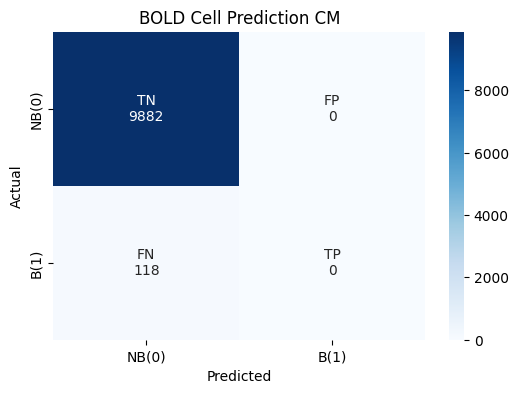


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---
No bold cells predicted.

--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0



Filename: ../data/manual_val/ffelbydefermenttype.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(15,0): 0.468365 | (0,15): 0.471065 | (17,0): 0.476474 | (0,17): 0.479515 | (0,2): 0.487217 | (29,0): 0.491625 | (17,1): 0.491638 | (15,1): 0.491790 | (31,0): 0.495073 | (18,0): 0.501188 | (29,1): 0.506314 | (31,1): 0.507509 | (21,0): 0.508722 | (10,0): 0.509158 | (0,10): 0.510447 | (19,0): 0.510976 | (7,0): 0.511438 | (0,7): 0.513787 | (23,0): 0.513930 | (25,0): 0.514135 | (5,15): 0.514804 | (5,17): 0.515113 | (6,17): 0.517441 | (5,11): 0.517731 | (19,1): 0.518052 | (6,15): 0.518310 | (5,13): 0.519103 | (21,1): 0.522412 | (13,0): 0.523638 | (9,0): 0.524089 | (0,13): 0.525784 | (0,9): 0.526450 | (25,1): 0.526577 | (5,9): 0.527202 | (23,1): 0.528366 | (18,1): 0.528634 | (13,1): 0.533668 | (27,0): 0.533936 | (9,1): 0.534972 | (5,7): 0.535620 | (7,1): 0.536516 | (10,1): 0.536674 | (27,1): 0.544112 | (11,0): 0.546360 | (11,1): 0.546792 | (0,11): 0.548519 | (5,5): 0.549473 | (20,0): 0.

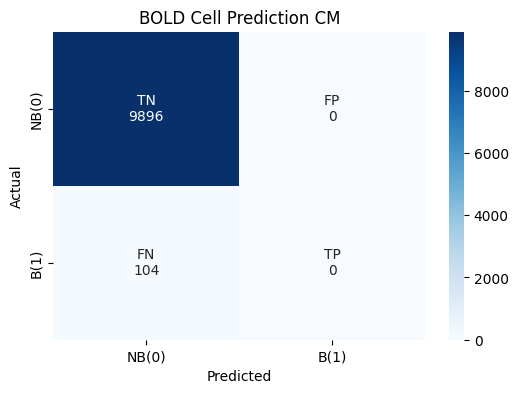


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---
No bold cells predicted.

--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Filename: ../data/manual_test/dlportfoliobyrepaymentplan.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(37,0): 0.456251 | (37,1): 0.466140 | (15,0): 0.468493 | (0,15): 0.470757 | (17,0): 0.476650 | (0,17): 0.479195 | (0,2): 0.487137 | (35,0): 0.488944 | (29,0): 0.491199 | (17,1): 0.491453 | (15,1): 0.491944 | (31,0): 0.493421 | (35,1): 0.497998 | (18,0): 0.501363 | (0,18): 0.503359 | (29,1): 0.506224 | (10,0): 0.507685 | (31,1): 0.507724 | (21,0): 0.508124 | (0,21): 0.509770 | (0,10): 0.510016 | (19,0): 0.510736 | (7,0): 0.511231 | (33,0): 0.512032 | (0,19): 0.512595 | (0,7): 0.513334 | (23,0): 0.513947 | (25,0): 0.514628 | (5,17): 0.515280 | (5,15): 0.515921 | (6,17): 0.517452 | (5,19): 0.517757 | (6,15): 0.518326 | (19,1): 0.518332 | (5,11): 0.519253 | (5,13): 0.519534 | (5,21): 0.519744 | (33,1): 0.521875 | (21,1): 0.522253 | (13,0): 0.523422 | (9,0): 0.523798 | (0,13): 0.525235 | (0,9): 0.526005 | (25,1): 0.526314 | (5,9): 0.527145 | (18,1): 0.528281 | (23,1): 0.528585 

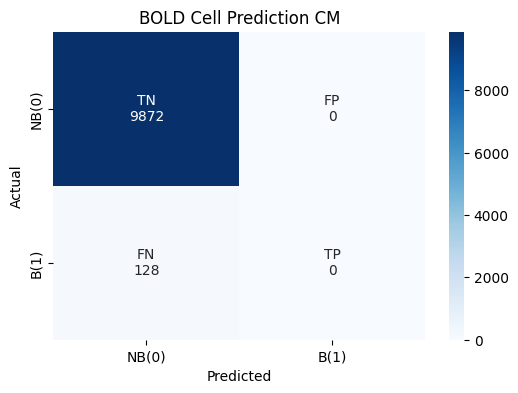


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---
No bold cells predicted.

--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Params
loc = 0
thresh = 0.995
import importlib
from utils import inferutil
importlib.reload(inferutil)
from utils.inferutil import infer_one
# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    config=config,
    disp_sig=True,
)
# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    config=config,
    disp_sig=True,
)
# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    config=config,
    disp_sig=True,
)

Batch Inference: 100%|██████████| 10/10 [00:02<00:00,  4.92it/s]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 400000:0 | Actual = 396714:3286
Accuracy: 99.18% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



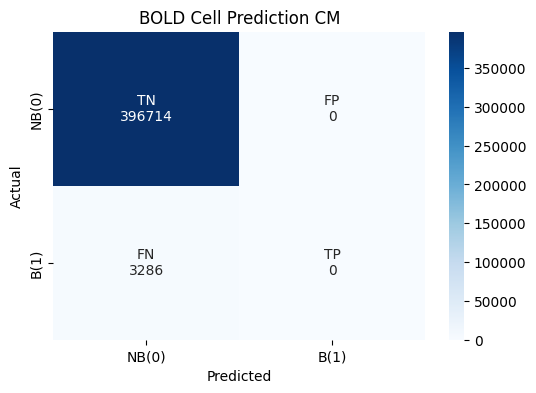

In [5]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    config=config,
)

Batch Inference: 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 50000:0 | Actual = 49602:398
Accuracy: 99.24% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



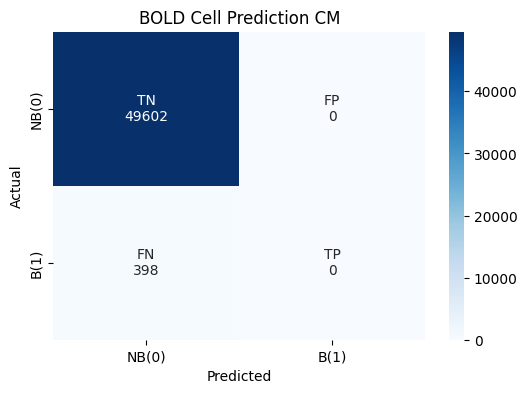

Batch Inference: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 50000:0 | Actual = 49606:394
Accuracy: 99.27% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



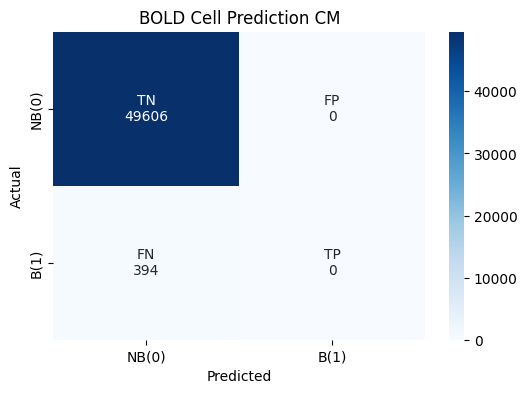

In [6]:
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    config=config,
)

# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    config=config,
)